## Exercise 1

In [1]:
import numpy as np
l1 = [2,5,6,4,5,9,3,2,2]
# Part a
A = np.array([l1]).reshape((3,3))
print(A)

[[2 5 6]
 [4 5 9]
 [3 2 2]]


In [2]:
# Part b
max_A = A.max()
idx_argm = A.argmax()
i_row, i_column = np.unravel_index(idx_argm, (A.shape)) # This calculates starting the count from 0, so to convert it into
# count starting from 1 we add 1 to i_row and i_column

print(f"The maximum of the matrix A is {max_A}, and it's position is in the {i_row +1}nd row and the {i_column +1}rd column \
starting the count from 1.")

The maximum of the matrix A is 9, and it's position is in the 2nd row and the 3rd column starting the count from 1.


In [3]:
# Part c
A_transpose = A.T
print(A_transpose)

[[2 4 3]
 [5 5 2]
 [6 9 2]]


In [4]:
# Part d
A_squared = A @ A_transpose
print(A_squared)
A_elements_squared = A**2
print(A_elements_squared)

[[ 65  87  28]
 [ 87 122  40]
 [ 28  40  17]]
[[ 4 25 36]
 [16 25 81]
 [ 9  4  4]]


In [5]:
# Part e
A_eigen = np.linalg.eig(A)[0]
print(f'The three eigenvalues of A are {A_eigen[0]}, {A_eigen[1]} and {A_eigen[2]}, where j indicates an imaginary number \
equal to the square root of -1.')

The three eigenvalues of A are (11.939684757354135+0j), (-1.469842378677075+0.9687479913024757j) and (-1.469842378677075-0.9687479913024757j), where j indicates an imaginary number equal to the square root of -1.


In [6]:
# Part f
f1 = np.zeros((3, 3))
f2 = np.eye(3)
f3 = np.ones((3, 3))
A_times_zeros = A@f1
A_times_identity = A@f2
A_times_ones = A@f3
print(A_times_zeros)
print(A_times_identity)
print(A_times_ones)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[2. 5. 6.]
 [4. 5. 9.]
 [3. 2. 2.]]
[[13. 13. 13.]
 [18. 18. 18.]
 [ 7.  7.  7.]]


In [7]:
# Part g
l_2 = np.linspace(1,9,9)
B = np.array([l_2]).reshape((3,3))

A_times_B = A @ B
print(A_times_B)

[[ 64.  77.  90.]
 [ 87. 105. 123.]
 [ 25.  32.  39.]]


## Exercise 2

In [8]:
# Part a
new_list = []
for i in range(len(l1)):
    if l1[i]<5:
        new_list.append(l1[i])
print(new_list)

[2, 4, 3, 2, 2]


In [9]:
# Part b
newlist_1 = []
for i in range(len(l1)):
    if 3<l1[i] and l1[i]<=7:
        newlist_1.append(l1[i])
print(newlist_1)

[5, 6, 4, 5]


In [10]:
# Part c
def check_matrix(matrix, number):
    rows = matrix.shape[0]
    columns= matrix.shape[1]

    for i in range(rows*columns):
        row_index = i//matrix.shape[0]
        column_index = i%matrix.shape[1]
        if matrix[row_index][column_index] == number:
            return f"The matrix contains a {number}."
    else:
        return f"The matrix does not contain a {number}."
print(check_matrix(A, 5))

The matrix contains a 5.


In [11]:
# Part d
def matrix_B(matrix, number):
    rows = matrix.shape[0]
    columns= matrix.shape[1]
    
    new_matrix = np.zeros((rows, columns))
    for i in range(rows*columns):
        row_index = i//matrix.shape[0]
        column_index = i%matrix.shape[1]
        if matrix[row_index][column_index] >= number:
            new_matrix[row_index][column_index] = matrix[row_index][column_index]
        else:
            new_matrix[row_index][column_index] = 0
    return new_matrix
B = matrix_B(A, 4)
print(B)

[[0. 5. 6.]
 [4. 5. 9.]
 [0. 0. 0.]]


In [12]:
# Part e
def count_zeros(matrix):
    count = 0
    rows = matrix.shape[0]
    columns= matrix.shape[1]
    for i in range(rows*columns):
        row_index = i//matrix.shape[0]
        column_index = i%matrix.shape[1]
        if matrix[row_index][column_index] == 0:
            count += 1
    return f"The number of zeros in the matrix is {count}."
print(count_zeros(B))

The number of zeros in the matrix is 4.


## Exercise 3

In [13]:
# Part a
def cobb_douglas(K, L, A, alpha, sigma):
    if sigma == 1:
        return A * K**alpha * L**(1 - alpha)
    else:
        return A * ((alpha * K**((sigma-1)/sigma) + (1-alpha) * L**((sigma-1)/sigma))**(sigma/(sigma-1)))


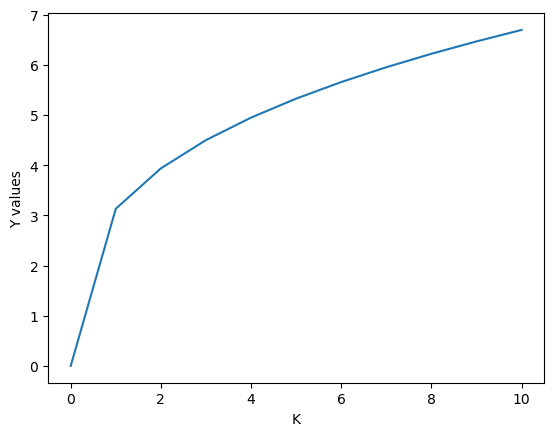

In [14]:
# Part b
import matplotlib.pyplot as plt
A = 1.5
alpha = 0.33
L= 3
sigma = 1

K_max = 10
K_min = 0
number_K = 11
K = np.linspace(K_min, K_max, number_K)

def Y(grid, L, A, alpha, sigma):
    Y = []
    for i in range(len(grid)):
        Y.append(cobb_douglas(grid[i], L, A, alpha, sigma))
    return Y
plt.xlabel('K')
plt.ylabel('Y values')
plt.plot(K, Y(K, L, A, alpha, sigma))


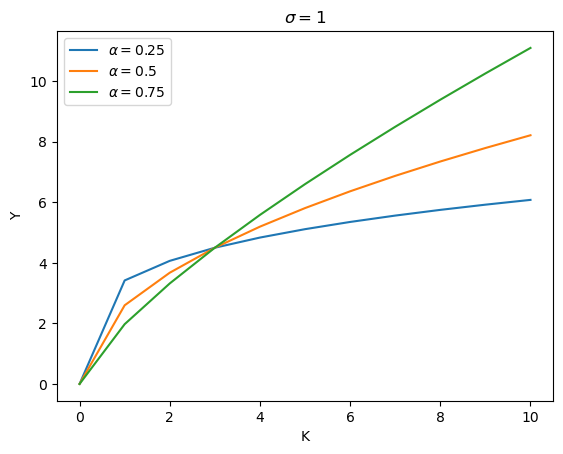

In [15]:
# Part c
alphas = [0.25, 0.5, 0.75]

for i, alpha in enumerate(alphas):
    Y_values = Y(K, L, A, alpha, sigma)
    plt.plot(K, Y_values, label=f'$\\alpha={alpha}$')
plt.xlabel('K')
plt.ylabel('Y')
plt.title(f'$\\sigma = 1$')
plt.legend()
plt.show()

/tmp/ipykernel_310/2343025879.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  return A * ((alpha * K**((sigma-1)/sigma) + (1-alpha) * L**((sigma-1)/sigma))**(sigma/(sigma-1)))


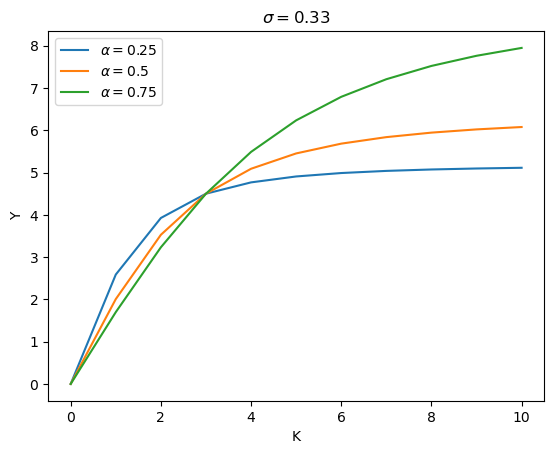

In [16]:
# Part d
sigma = 0.33
for i, alpha in enumerate(alphas):
    Y_values = Y(K, L, A, alpha, sigma)
    plt.plot(K, Y_values, label=f'$\\alpha={alpha}$')
plt.xlabel('K')
plt.ylabel('Y')
plt.title(f'$\\sigma = 0.33$') 
plt.legend()
plt.show()

/tmp/ipykernel_310/2343025879.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  return A * ((alpha * K**((sigma-1)/sigma) + (1-alpha) * L**((sigma-1)/sigma))**(sigma/(sigma-1)))


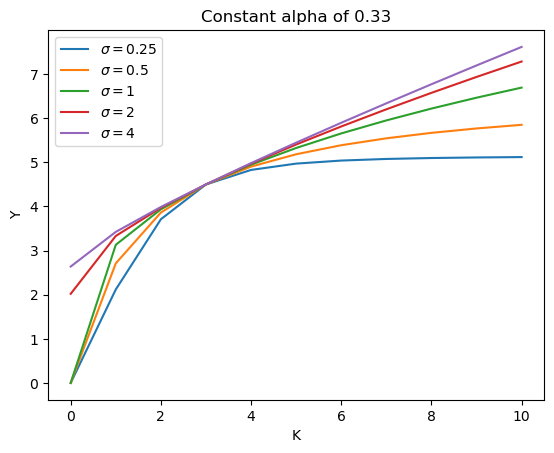

In [17]:
# Part e
sigmas = [0.25, 0.5, 1, 2, 4]

for i, sigma in enumerate(sigmas):
    Y_values = Y(K, 3, 1.5, 0.33, sigma)
    plt.plot(K, Y_values, label=f'$\sigma={sigma}$')
plt.xlabel('K')
plt.ylabel('Y')
plt.title('Constant alpha of 0.33')
plt.legend()
plt.show()

## Part f
When sigma is less than 1, it implies that capital and labour are substitutes. An increase in capital (K) will lead to a proportionally smaller increase in the marginal product of labour, and vice versa. As sigma decreases, the production function becomes more substitutable, and the impact of changes in K on Y becomes less pronounced.
When sigma is greater than 1, it implies that capital and labour are complements. An increase in capital (K) will lead to a proportionally larger increase in the marginal product of labour, and vice versa. As sigma increases, the production function becomes more complementary, and the joint use of capital and labour becomes more important for increasing output (Y).
As sigma increases the line gets straighter, if we kept increasing sigma we would expect to end up with the line y=3+x/2.
The lines all meet at K=3 and Y=4.5, where after this the greater the sigma the greater the long run value of Y it ends up at.


## Exercise 4

In [18]:
import sympy as sym
# Part a
def steady_state(s=0.4, A=4, alpha=0.3, delta=0.7):
    k = sym.symbols('k')
    eq = sym.Eq(k, s * A * k**alpha + (1 - delta) * k)
    steady_state_capital = sym.solve(eq, k)
    
    # Remove 0 if present and ensure a single value for steady_state_capital
    steady_state_capital = [result for result in steady_state_capital if result != 0]
    steady_state_capital = steady_state_capital[0]
    steady_state_output = A * steady_state_capital**alpha
    return steady_state_capital, steady_state_output

steady_state_capital, steady_state_output = steady_state()

print(f"The steady-state capital per worker is {steady_state_capital} and the output per worker is {steady_state_output}.")


The steady-state capital per worker is 3.25753049114621 and the output per worker is 5.70067835950586.


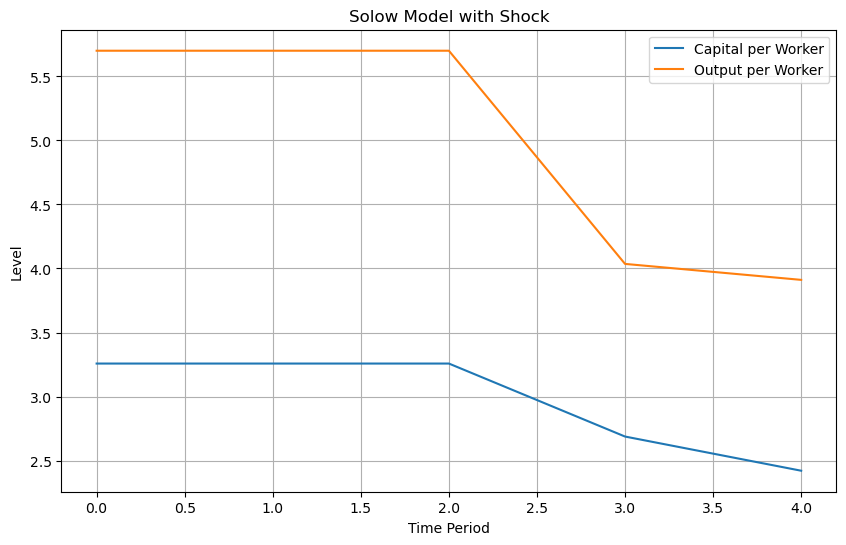

In [19]:
# Part b
def solow_model(s=0.4, A=4, alpha=0.3, delta=0.7, epsilon=0.5, periods=100):
    k_t = steady_state()[0]
    k_values = [k_t]
    output_values = [A * k_t**alpha]

    for t in range(1, periods):
        if t == 3:
            A *= 0.75

        k_t_plus_1 = s * A * k_values[-1]**alpha + (1 - delta) * k_values[-1]
        k_values.append(k_t_plus_1)

        output_t_plus_1 = A * k_t_plus_1**alpha
        output_values.append(output_t_plus_1)

        if t>3 and abs(k_values[-1] - k_values[-2]) < epsilon:
            break

        k_t = k_t_plus_1

    return k_values, output_values

k_values, output_values = solow_model()

time_grid = np.arange(len(k_values))

plt.figure(figsize=(10, 6))
plt.plot(time_grid, k_values, label='Capital per Worker')
plt.plot(time_grid, output_values, label='Output per Worker')
plt.title('Solow Model with Shock')
plt.xlabel('Time Period')
plt.ylabel('Level')
plt.legend()
plt.grid(True)
plt.show()


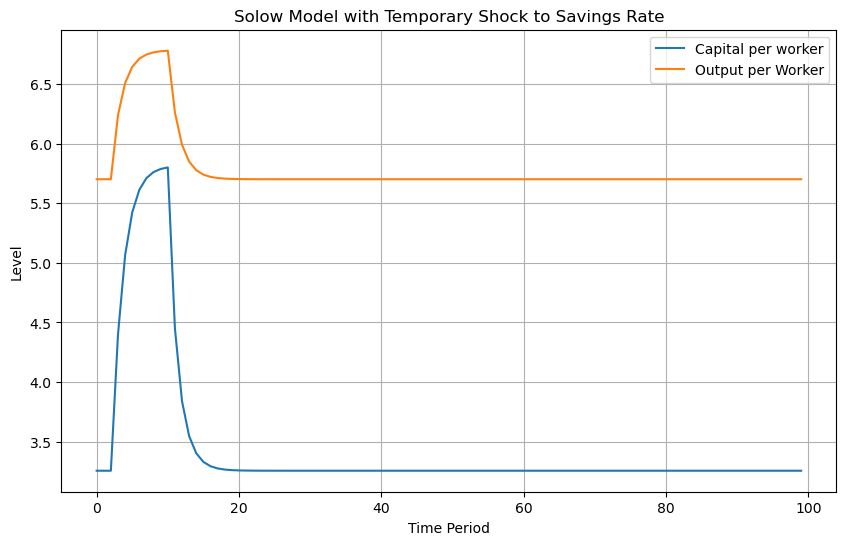

In [24]:
# Part c
import matplotlib.pyplot as plt
import numpy as np

def solow_model(s=0.4, A=4, alpha=0.3, delta=0.7, periods=100, shock_start=3, shock_end=10, new_s=0.6):
    k_t = steady_state()[0]
    k_values = [k_t]
    output_values = [A * k_t**alpha]

    for t in range(1, periods):
        if shock_start <= t <= shock_end:
            s = new_s
        else:
            s = 0.4

        k_t_plus_1 = s * A * k_t**alpha + (1 - delta) * k_t
        k_values.append(k_t_plus_1)

        output_t_plus_1 = A * k_t_plus_1**alpha
        output_values.append(output_t_plus_1)

        k_t = k_t_plus_1

    return k_values, output_values

k_values, output_values = solow_model()

time_grid = np.arange(len(output_values))

plt.figure(figsize=(10, 6))
plt.plot(time_grid, k_values, label='Capital per worker')
plt.plot(time_grid, output_values, label='Output per Worker')
plt.title('Solow Model with Temporary Shock to Savings Rate')
plt.xlabel('Time Period')
plt.ylabel('Level')
plt.legend()
plt.grid(True)
plt.show()


## Part c explanation
The orange line in the plot represents the output per worker over time. Initially, the economy is in the steady state and from t=3 to t=10, there is a temporary shock where the savings rate increases to s=0.6. During this period, the higher savings rate leads to increased capital accumulation, and consequently, there is an increase in output per worker. After t=10, when the savings rate goes back to the original value s=0.4, the output per worker stabilises back to the initial steady state level.

The blue line represents the capital per worker over time. During the shock period, the higher savings rate results in a faster accumulation of capital, leading to an increase in capital per worker. After the shock period, when the savings rate returns to the original value, the capital per worker stabilises back to the initial steady state level.

In summary, a temporary increase in the savings rate leads to higher capital accumulation and, consequently, an increase in output per worker. This demonstrates the positive relationship between savings, capital accumulation, and economic output in the Solow model. The plot visually illustrates the impact of the temporary change in the savings rate on the dynamic behavior of the economy, showing the adjustment process of the economy towards a new steady state.